In [1]:
!pip install -q kaggle

In [2]:
# Import kaggle access key
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manuel14","key":"3b9dfe18c100635bc3acf633996e3786"}'}

In [3]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 414M/428M [00:02<00:00, 137MB/s]
100% 428M/428M [00:02<00:00, 166MB/s]


In [6]:
!mkdir dataset

In [7]:
!unzip toronto-emotional-speech-set-tess -d dataset

Archive:  toronto-emotional-speech-set-tess.zip
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_base_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bath_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bean_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_beg_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bite_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_boat_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_bone_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_book_fear.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_

In [ ]:
!pip install librosa

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [10]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/dataset/TESS Toronto emotional speech set data'):
  for filename in filenames:
      paths.append(os.path.join(dirname, filename))
      label = filename.split('_')[-1]
      label = label.split('.')[0]
      labels.append(label.lower())
  if len(paths) == 2800:
      break
print('Dataset is Loaded')

Dataset is Loaded


In [11]:
len(paths)

1661

In [12]:
paths[:5]

['/content/dataset/TESS Toronto emotional speech set data/OAF_disgust/OAF_wash_disgust.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_disgust/OAF_turn_disgust.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_disgust/OAF_rot_disgust.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_disgust/OAF_said_disgust.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_disgust/OAF_fall_disgust.wav']

In [13]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

Now create a dataframe of the audio files and labels

In [14]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head(100)

,speech,label
0,/content/dataset/TESS Toronto emotional speech...,disgust
1,/content/dataset/TESS Toronto emotional speech...,disgust
2,/content/dataset/TESS Toronto emotional speech...,disgust
3,/content/dataset/TESS Toronto emotional speech...,disgust
4,/content/dataset/TESS Toronto emotional speech...,disgust
...,...,...
95,/content/dataset/TESS Toronto emotional speech...,disgust
96,/content/dataset/TESS Toronto emotional speech...,disgust
97,/content/dataset/TESS Toronto emotional speech...,disgust
98,/content/dataset/TESS Toronto emotional speech...,disgust


In [15]:
df['label'].value_counts()

angry      400
disgust    261
happy      200
sad        200
fear       200
ps         200
neutral    200
Name: label, dtype: int64

Exploratory Data Analysis

In [16]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

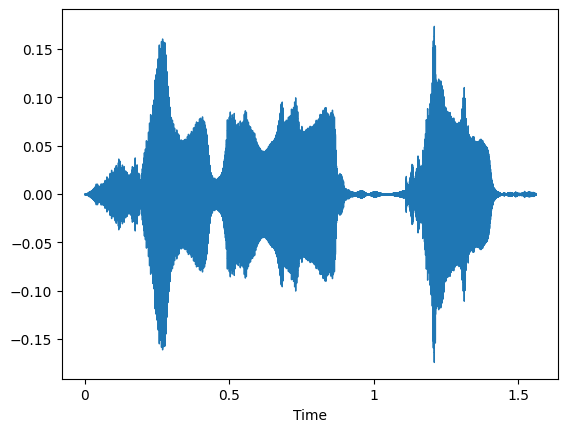

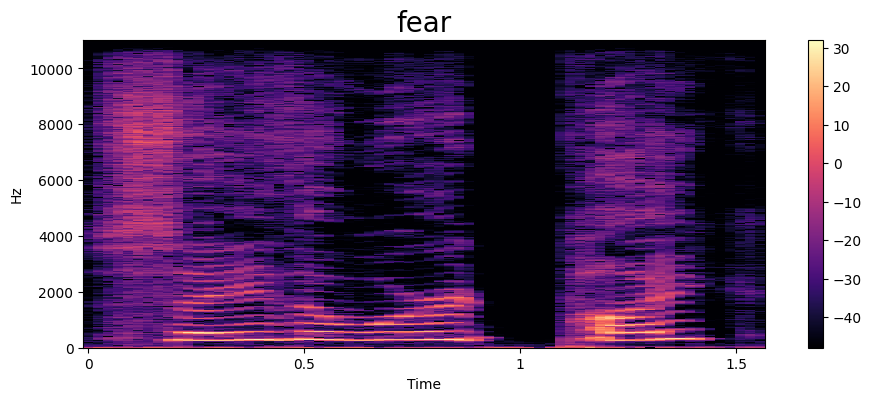

In [18]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

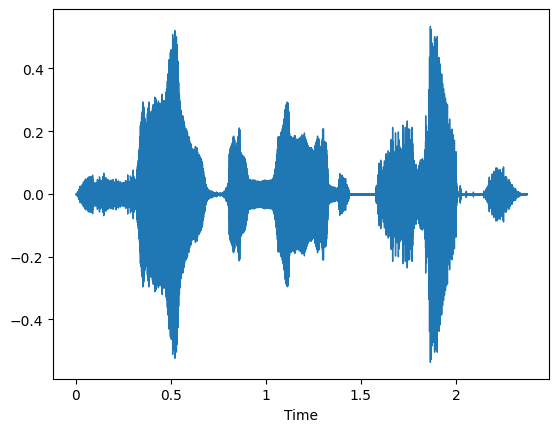

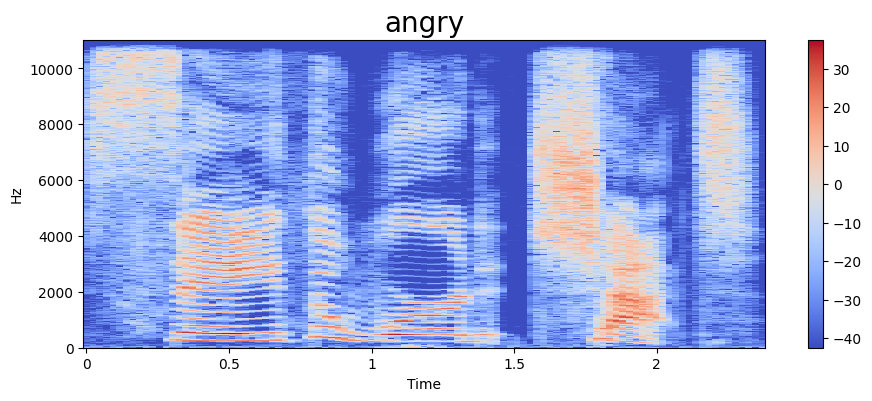

In [19]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

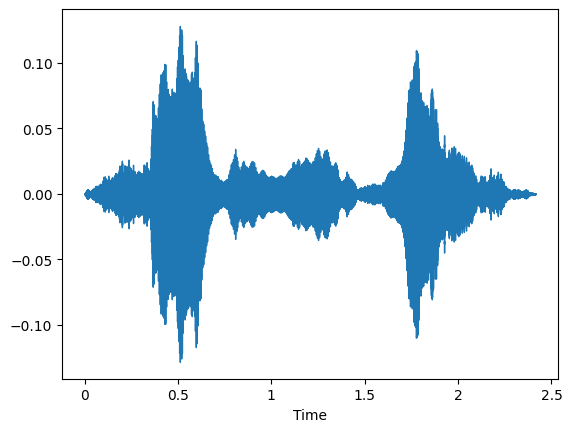

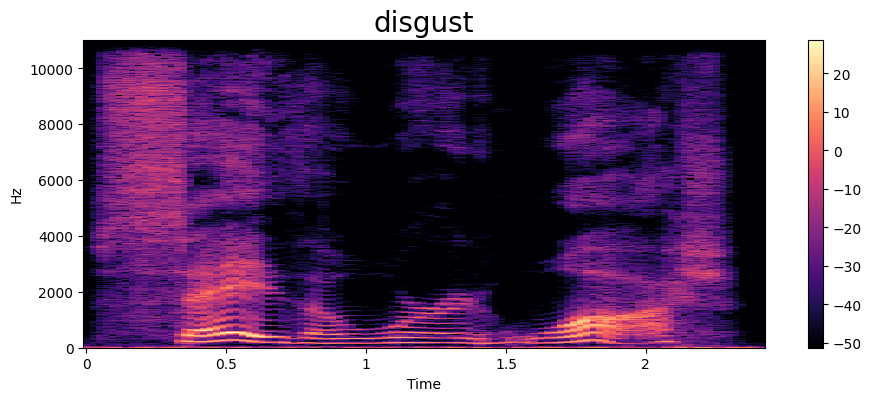

In [20]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

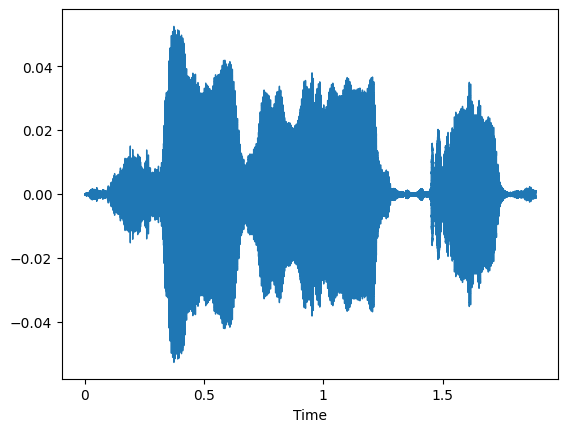

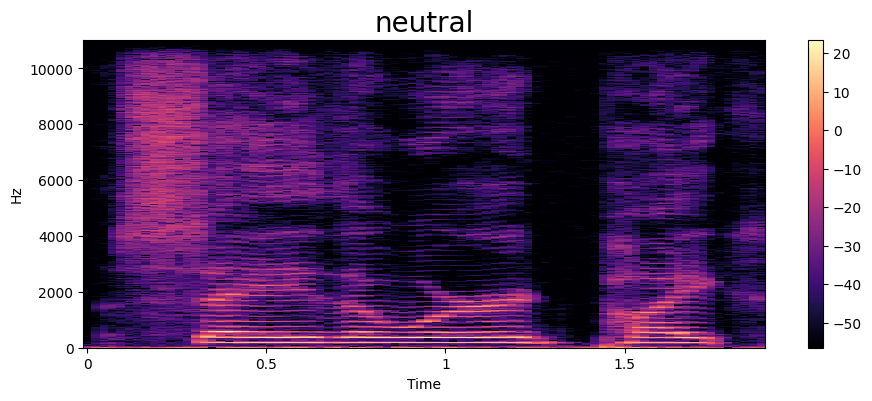

In [21]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

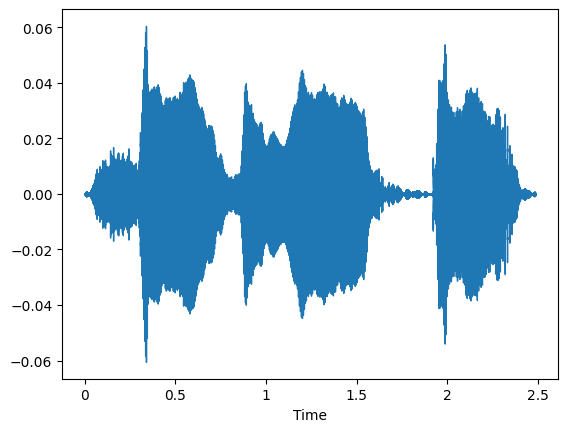

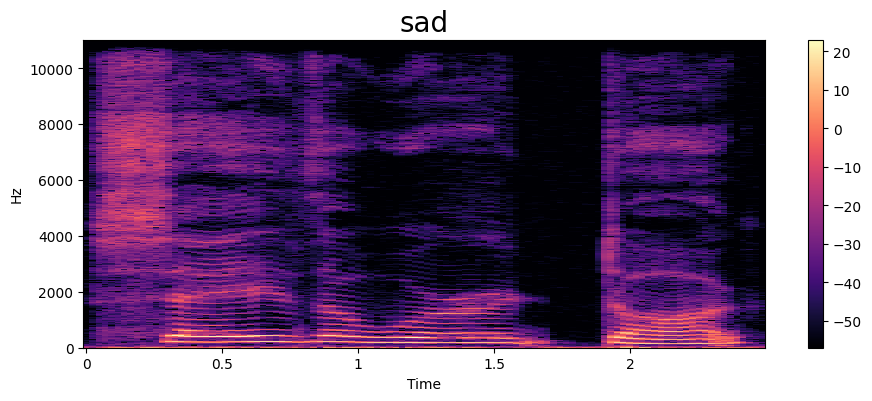

In [22]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

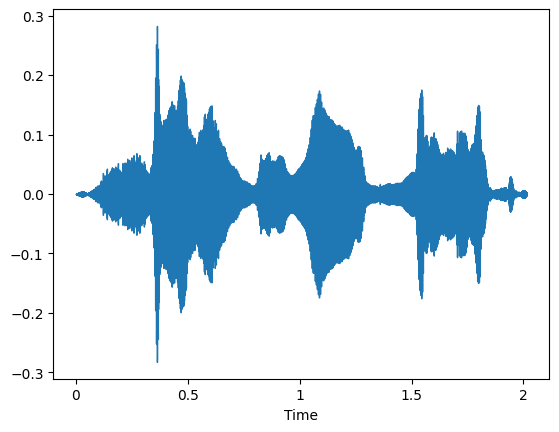

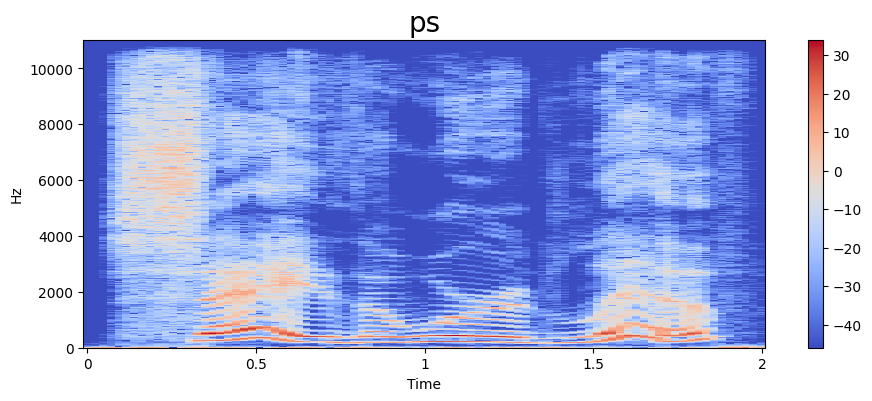

In [23]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

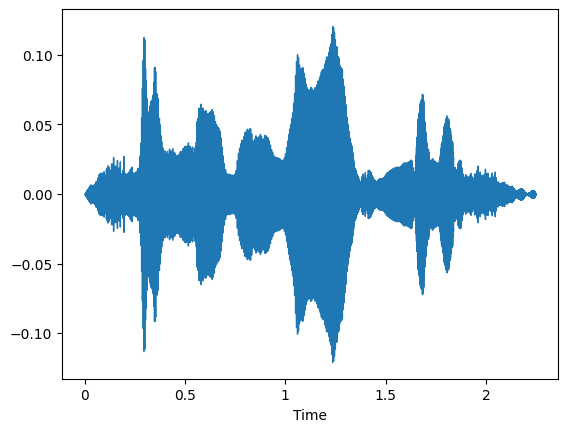

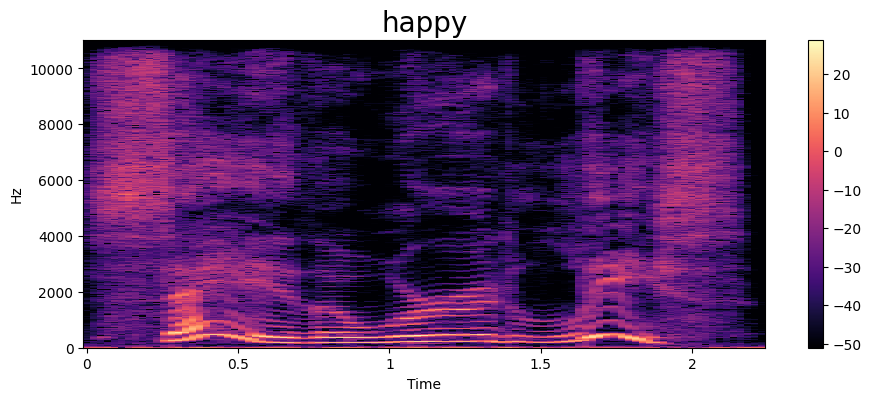

In [24]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [25]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [26]:
extract_mfcc(df['speech'][0])

array([-4.83603455e+02,  1.04488998e+02,  2.26374874e+01, -2.66935325e+00,
        7.69611478e-01, -4.46489906e+00, -8.27487373e+00,  3.42516947e+00,
       -2.02822361e+01,  3.17148417e-01, -6.60767031e+00, -2.31091833e+00,
       -1.94281077e+00,  3.54964209e+00, -4.51398462e-01,  6.16727400e+00,
       -5.28212595e+00,  4.36985302e+00,  1.31021488e+00, -5.13074207e+00,
        6.87727571e-01, -2.00824022e+00, -5.22079468e+00,  1.37093052e-01,
       -1.95018208e+00,  3.66500401e+00,  1.32870618e-02,  4.86191320e+00,
       -1.05474627e+00, -2.81123258e-02, -1.71826172e+00,  1.60277677e+00,
        1.62704611e+00,  2.29749084e+00,  5.48557043e+00,  5.51619101e+00,
        9.08447552e+00,  1.05235004e+01,  1.31249275e+01,  1.39662895e+01],
      dtype=float32)

In [27]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [28]:
X_mfcc

0       [-483.60345, 104.489, 22.637487, -2.6693532, 0...
1       [-458.50583, 123.057175, 15.278493, -21.048275...
2       [-481.0959, 131.35335, 17.93356, -20.549616, 3...
3       [-417.58667, 86.40378, 9.267142, -10.608457, 1...
4       [-499.7659, 110.29437, 38.5693, -5.6551895, -3...
                              ...                        
1656    [-415.72107, 111.62535, 9.332602, 6.7685246, -...
1657    [-435.8804, 95.230865, 0.7936676, 20.53052, -3...
1658    [-407.32117, 115.994644, -1.4443316, 10.601314...
1659    [-385.07043, 114.565315, -16.425419, 12.502726...
1660    [-427.0305, 76.465034, -3.597804, 39.79605, -9...
Name: speech, Length: 1661, dtype: object

In [29]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1661, 40)

In [30]:
## input split
X = np.expand_dims(X, -1)
X.shape

(1661, 40, 1)

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [32]:
y = y.toarray()

In [33]:
y.shape

(1661, 7)

Create the LSTM Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [35]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
21/21 [==============================] - 10s 51ms/step - loss: 1.5519 - accuracy: 0.3938 - val_loss: 2.6495 - val_accuracy: 0.0060
Epoch 2/50
21/21 [==============================] - 0s 14ms/step - loss: 0.9207 - accuracy: 0.6363 - val_loss: 2.7630 - val_accuracy: 0.0931
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 0.7136 - accuracy: 0.7492 - val_loss: 3.0802 - val_accuracy: 0.2192
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.5215 - accuracy: 0.8223 - val_loss: 3.5406 - val_accuracy: 0.3003
Epoch 5/50
21/21 [==============================] - 0s 13ms/step - loss: 0.4696 - accuracy: 0.8381 - val_loss: 3.5878 - val_accuracy: 0.3574
Epoch 6/50
21/21 [==============================] - 0s 10ms/step - loss: 0.3260 - accuracy: 0.8976 - val_loss: 3.9718 - val_accuracy: 0.3784
Epoch 7/50
21/21 [==============================] - 0s 10ms/step - loss: 0.2393 - accuracy: 0.9352 - val_loss: 4.3475 - val_accuracy: 0.3634
Epoch 8/50
2

Plot the results

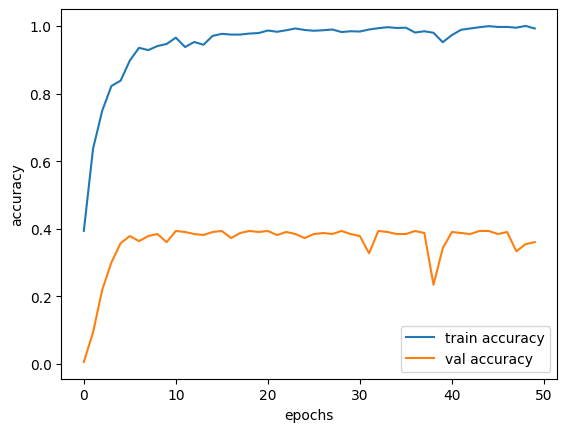

In [36]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

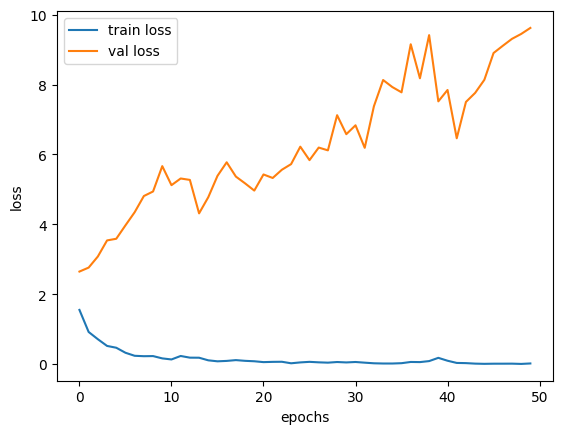

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Save model

In [38]:
model.save('models/speech_recog_002.h5')

CNN Tests

In [49]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [50]:
tess = '/content/dataset/TESS Toronto emotional speech set data/'

In [52]:
tess_directory_list = os.listdir(tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,disgust,/content/dataset/TESS Toronto emotional speech...
1,disgust,/content/dataset/TESS Toronto emotional speech...
2,disgust,/content/dataset/TESS Toronto emotional speech...
3,disgust,/content/dataset/TESS Toronto emotional speech...
4,disgust,/content/dataset/TESS Toronto emotional speech...


In [53]:
data_path = pd.concat([Tess_df], axis=0)
data_path.to_csv('data_path.csv', index=False)
data_path.head()

,Emotions,Path
0,disgust,/content/dataset/TESS Toronto emotional speech...
1,disgust,/content/dataset/TESS Toronto emotional speech...
2,disgust,/content/dataset/TESS Toronto emotional speech...
3,disgust,/content/dataset/TESS Toronto emotional speech...
4,disgust,/content/dataset/TESS Toronto emotional speech...


In [55]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [81]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=5)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

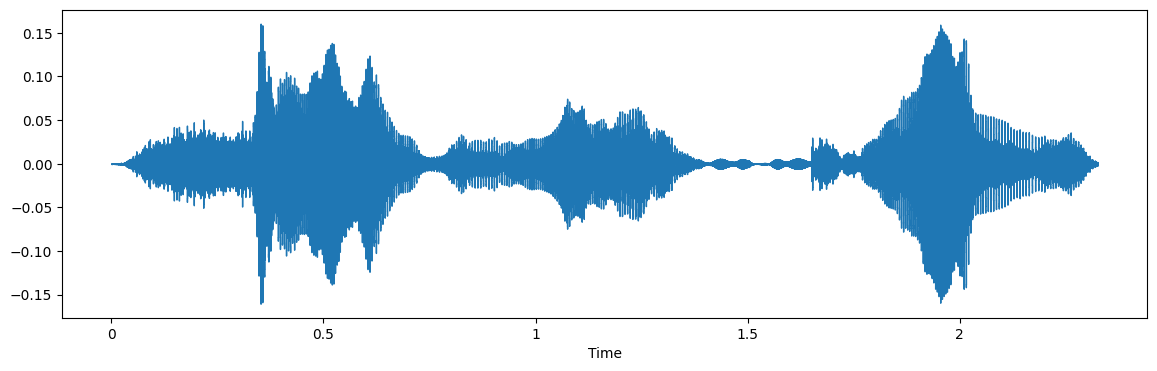

In [72]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

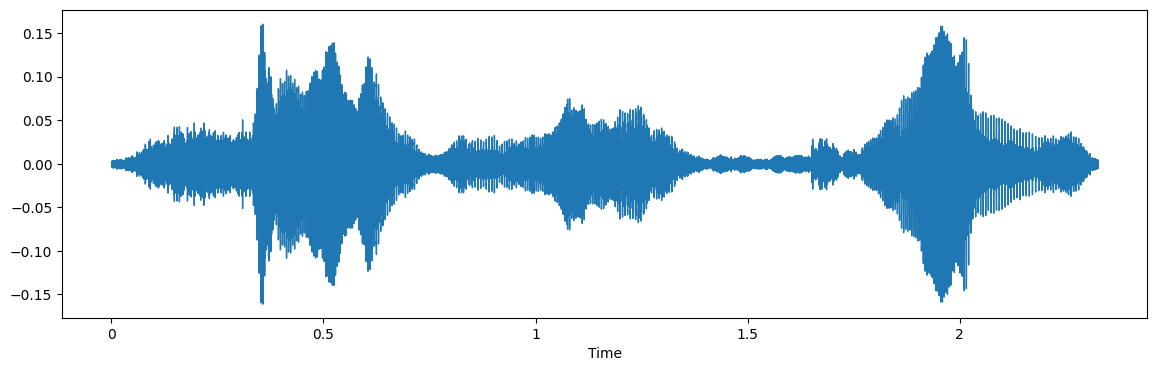

In [73]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

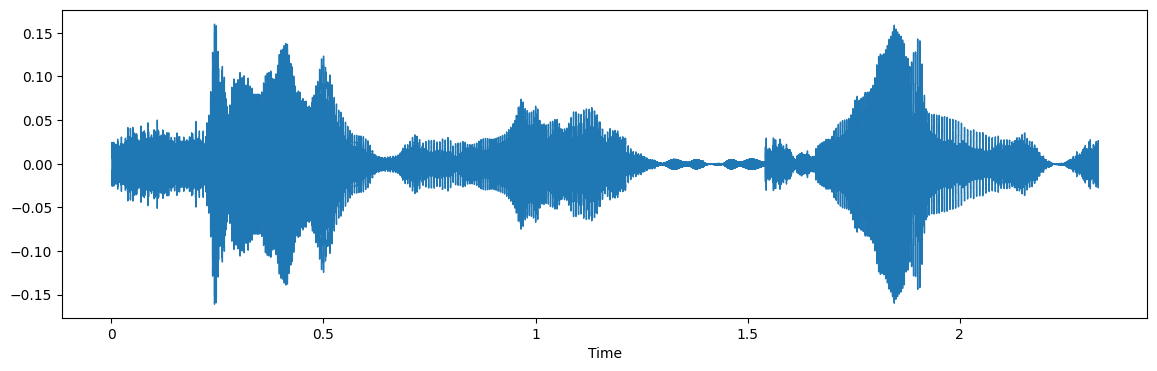

In [74]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [75]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [82]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [83]:
len(X), len(Y), data_path.Path.shape

(4983, 4983, (1661,))

In [84]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.057203,0.443307,0.444956,0.367611,0.467195,0.588519,0.630920,0.539415,0.517703,0.452092,...,0.000030,0.000031,0.000025,0.000018,0.000015,0.000012,0.000012,0.000007,1.331005e-06,disgust
1,0.073378,0.497620,0.488039,0.428585,0.525729,0.627513,0.648220,0.549544,0.535300,0.476807,...,0.000058,0.000061,0.000057,0.000051,0.000044,0.000043,0.000042,0.000036,3.192908e-05,disgust
2,0.075479,0.498335,0.434523,0.378839,0.375135,0.359477,0.389849,0.388575,0.307130,0.463411,...,0.000011,0.000010,0.000010,0.000012,0.000015,0.000018,0.000015,0.000007,9.478375e-07,disgust
3,0.044687,0.442178,0.453122,0.495789,0.580163,0.614759,0.582901,0.544946,0.573754,0.542301,...,0.000100,0.000102,0.000122,0.000120,0.000086,0.000045,0.000034,0.000014,5.679373e-07,disgust
4,0.145189,0.566158,0.574360,0.626977,0.704624,0.701868,0.636357,0.593666,0.621060,0.608368,...,0.000836,0.000852,0.000919,0.000917,0.000864,0.000866,0.000782,0.000839,7.908048e-04,disgust


In [85]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [86]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [87]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3737, 162), (3737, 7), (1246, 162), (1246, 7))

In [88]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3737, 162), (3737, 7), (1246, 162), (1246, 7))

In [89]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3737, 162, 1), (3737, 7), (1246, 162, 1), (1246, 7))

In [93]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 162, 256)          1536      
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 81, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 81, 256)           327936    
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 41, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 21, 128)         

In [94]:
# Train the model
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/200
59/59 [==============================] - 5s 24ms/step - loss: 1.4670 - accuracy: 0.4271 - val_loss: 1.0261 - val_accuracy: 0.6364 - lr: 0.0010
Epoch 2/200
59/59 [==============================] - 1s 11ms/step - loss: 1.0218 - accuracy: 0.6077 - val_loss: 0.6481 - val_accuracy: 0.7881 - lr: 0.0010
Epoch 3/200
59/59 [==============================] - 1s 11ms/step - loss: 0.6724 - accuracy: 0.7517 - val_loss: 0.4299 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 4/200
59/59 [==============================] - 1s 12ms/step - loss: 0.4661 - accuracy: 0.8269 - val_loss: 0.3176 - val_accuracy: 0.8997 - lr: 0.0010
Epoch 5/200
59/59 [==============================] - 1s 12ms/step - loss: 0.3601 - accuracy: 0.8713 - val_loss: 0.2296 - val_accuracy: 0.9230 - lr: 0.0010
Epoch 6/200
59/59 [==============================] - 1s 11ms/step - loss: 0.2615 - accuracy: 0.9082 - val_loss: 0.2240 - val_accuracy: 0.9262 - lr: 0.0010
Epoch 7/200
59/59 [==============================] - 1s 11ms/step - lo

39/39 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9783
Accuracy of our model on test data :  97.8330671787262 %


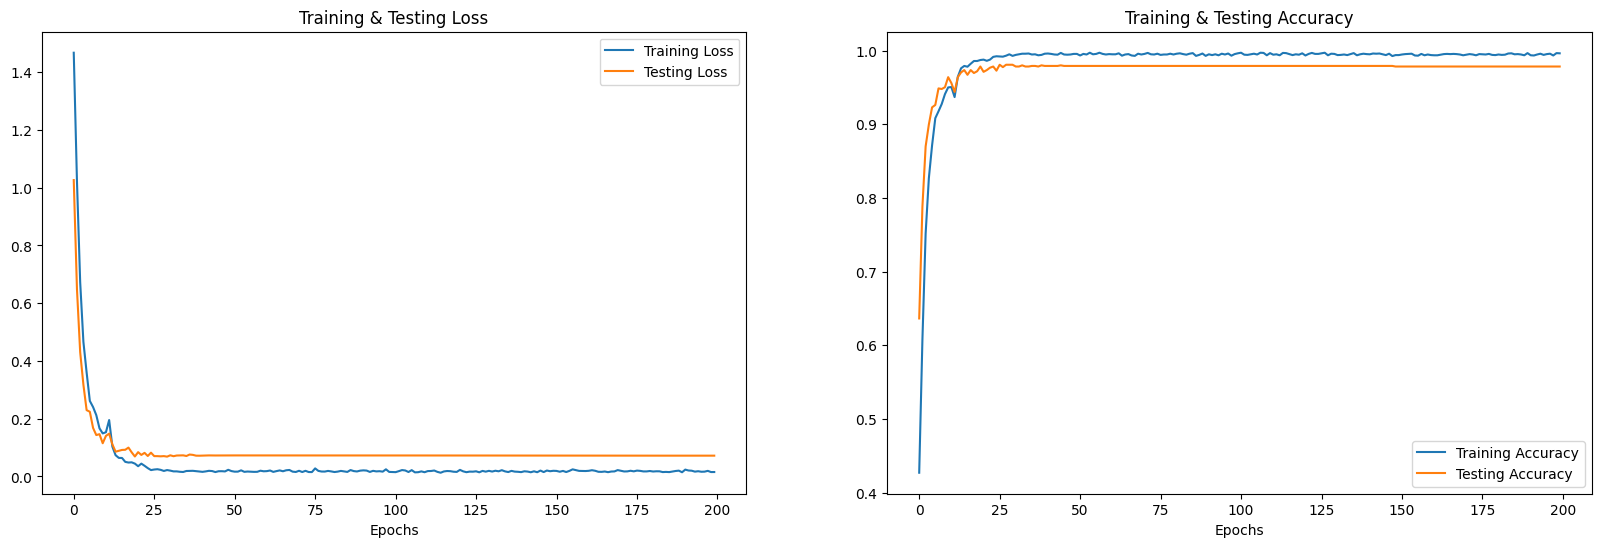

In [95]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [96]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

39/39 [==============================] - 0s 3ms/step


In [97]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,disgust,disgust
3,disgust,disgust
4,neutral,neutral
5,disgust,disgust
6,surprise,disgust
7,neutral,neutral
8,fear,fear
9,happy,happy


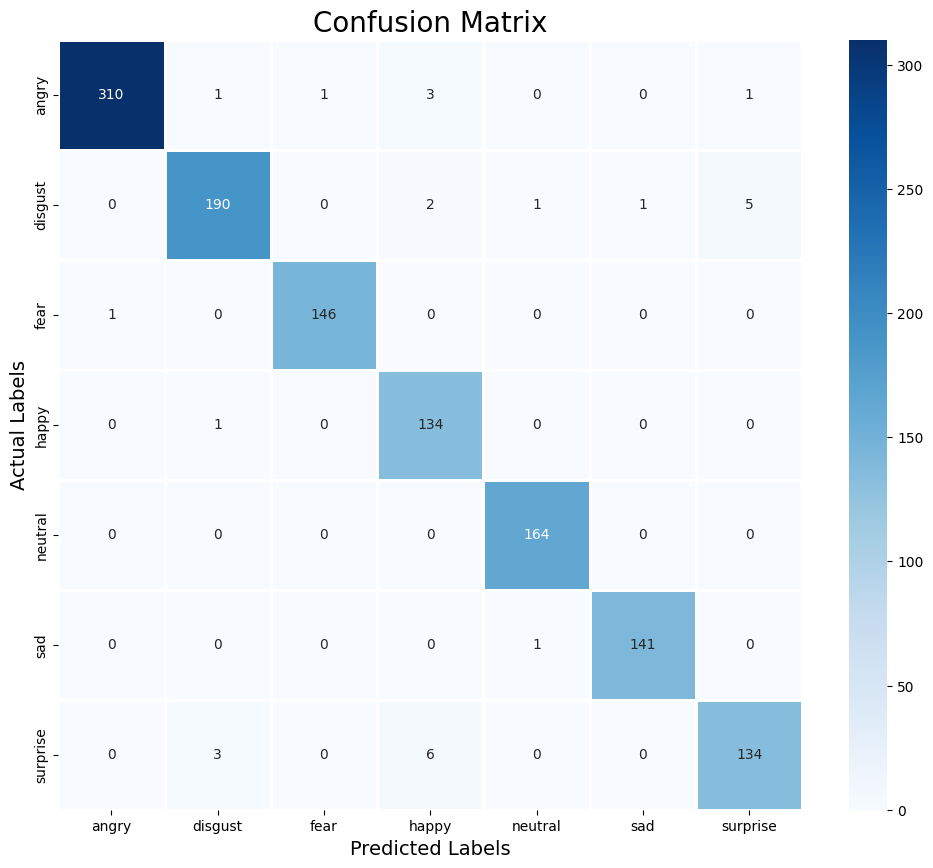

In [98]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       1.00      0.98      0.99       316
     disgust       0.97      0.95      0.96       199
        fear       0.99      0.99      0.99       147
       happy       0.92      0.99      0.96       135
     neutral       0.99      1.00      0.99       164
         sad       0.99      0.99      0.99       142
    surprise       0.96      0.94      0.95       143

    accuracy                           0.98      1246
   macro avg       0.98      0.98      0.98      1246
weighted avg       0.98      0.98      0.98      1246



In [100]:
model.save('models/speech_recog_003.h5')